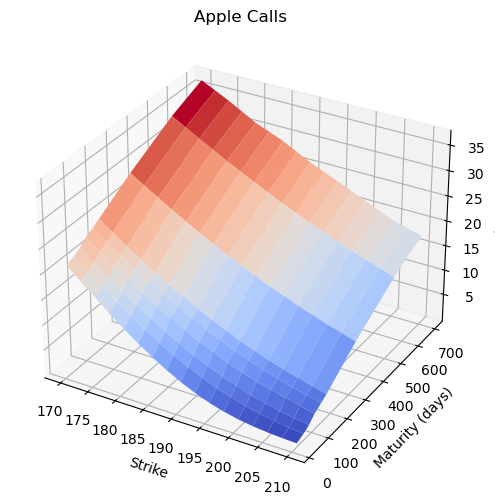

In [1]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import cm

Parameters

In [3]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'Heston' 


# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3

Finding A Starting Point

In [4]:
#set 1: promising starting point
params1 = (1.0, 0.02, 0.05, -0.4, 0.08)
params2 = (3.0, 0.06, 0.10, -0.6, 0.04)
    
# set 2: This one too
#params1 = (6.0, 0.05, 0.04, +0.7, 0.10)
#params2 = (1.0, 0.02, 0.10, -0.8, 0.04)
    
#set 3: tricky starting point
#params1 = (1.0, 0.0625, 0.0125, -0.7, 0.05)
#params2 = (8.0, 0.02,   0.05,   +0.6, 0.12)
    
# set 4: non-informative
#params1 = (4.0, 0.05, 0.03, -0.6, 0.10)
#params2 = (1.0, 0.10, 0.05, +0.7, 0.05) 

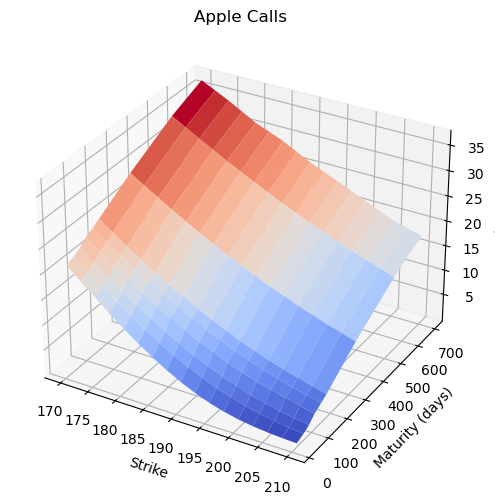

In [5]:
iArray = []
rmseArray = []
rmseMin = 1e10

maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

marketPrices = callPrices
maturities_years = maturities/365.0

In [6]:
for i in mfc.myRange(0, 1, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2) # linear interpolation
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model) # error value from RMSE
    rmseArray.append(rmse)
    if (rmse < rmseMin): # save values when minima is found  
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)

0.8658939945597837
[ 2.3     0.046   0.0825 -0.53    0.054 ]


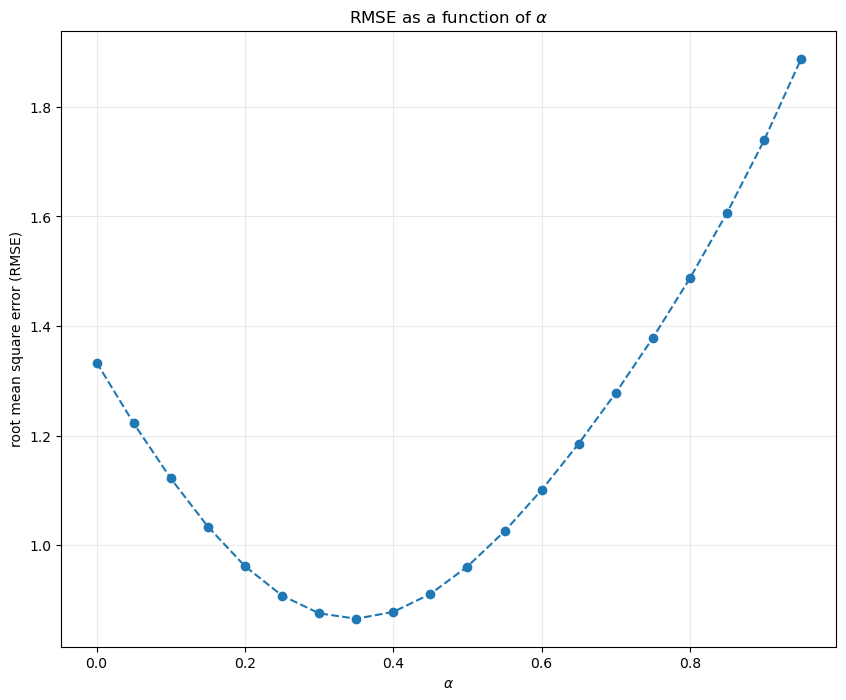

In [7]:
fig = plt.figure(figsize=(10,8))
plt.plot(iArray, rmseArray, 'o--')
plt.grid(alpha=0.25)
plt.xlabel('$\\alpha$')
plt.ylabel('root mean square error (RMSE)')
plt.title('RMSE as a function of $\\alpha$')
#plt.savefig('startingPoint4.png')
plt.show()